# Data Assimilation based on Lorenz '63 model

In [5]:
%load_ext autoreload
%autoreload 2

# Load general python modules
import importlib
import numpy as np
import matplotlib.pyplot as plt

# Load user modules
import lorenz63
import observation 
import ensemble 
import xyzplots
import filtering

# Ensuring reproducibility of statistical results
np.random.seed(0)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Creating the Truth for Data Assimilation

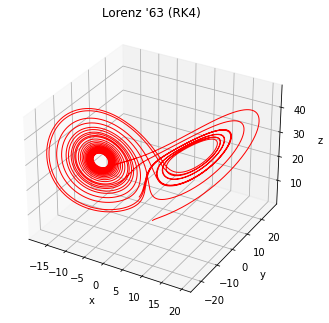

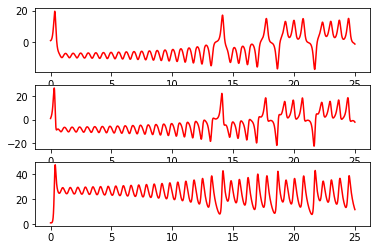

In [6]:
lorenz63_params_model  = { "p" : 10.0, "r" : 28.0, "b" : 8.0/3.0 }
#lorenz63_params_num    = { "tmax" : 25.0, "dt" : 1e-3 }
lorenz63_params_num    = { "tmax" : 25.0, "dt" : 1e-3 }
lorenz63_initial_state = [1,1,1]

lorenz63 = lorenz63.lorenz63( **lorenz63_params_model, **lorenz63_params_num )
lorenz63.setInitialState( lorenz63_initial_state )
lorenz63.simulate()
lorenz63.plot3D()
lorenz63.plot()


## Observing the True State

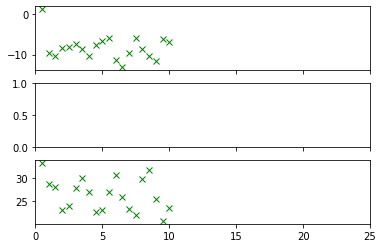

In [17]:
import observation
importlib.reload(observation)

#obs_params = { "dt" : 0.5, "tmax" : 15.0 }
obs_params = { "dt" : 0.5, "tmax" : 10.0 }
obs_variables = { "xobs" : True, "yobs" : False, "zobs" : True }

observation = observation.observation( **obs_params, **obs_variables )
observation.observe( lorenz63 )
observation.plot()

In [18]:
print(observation.obs)

[[  1.12909361  -9.68550035 -10.27876337  -8.46323031  -8.15270548
   -7.30905824  -8.66948578 -10.2973595   -7.76728761  -6.67496139
   -5.91091944 -11.23747719 -13.15626682  -9.70778447  -5.82207819
   -8.52384368 -10.43950154 -11.65093738  -6.08572364  -6.93116686]
 [ 33.22515299  28.66928656  27.88718249  23.03687328  23.86910996
   27.84586617  30.00590709  26.90385289  22.56646089  23.11706508
   26.83880901  30.67642883  25.87044034  23.24933455  22.04467973
   29.72455806  31.65589873  25.36061286  20.67235102  23.35744797]]


## Perturbing the Initial State

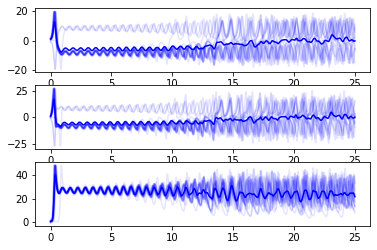

In [20]:
import ensemble 
importlib.reload(ensemble)

ensemble = ensemble.ensemble(lorenz63,20)
ensemble.simulate()
ensemble.mean()
ensemble.plot()

## Plotting Truth, Observations and Perturbed Models

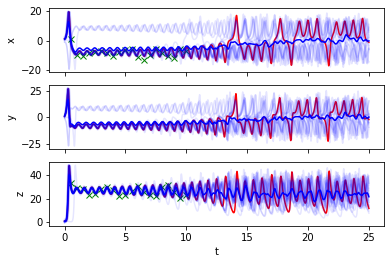

In [23]:
import xyzplots
importlib.reload(xyzplots)

xyzplots = xyzplots.xyzplots( lorenz63, observation, ensemble ) 
xyzplots.plot()

## Ensemble Kalman Filtering 

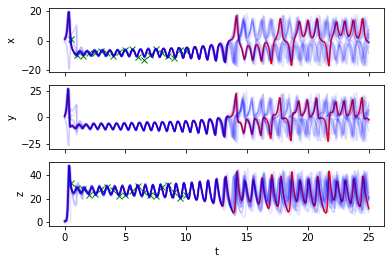

In [24]:
import filtering 
importlib.reload( filtering )

filtering = filtering.filtering( ensemble, observation, "EnKF" )
filtering.assimilate()
xyzplots.plot()